
# Introduction

In [132]:
import sys
import os
import math
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geodatasets
import geopandas as gpd
import re
import folium
from folium import plugins
import earthpy as et
import webbrowser
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap
from branca.colormap import LinearColormap
import statsmodels.api as sm
from scipy.stats import norm
import elevation
import shapely.geometry
from shapely.geometry import Point, box, Polygon, MultiPolygon
import seaborn as sns
from shapely.wkt import loads
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import rasterio
from rasterio.plot import show
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.transform import from_bounds, from_origin
from rasterio.mask import mask
import earthpy.spatial as es
from scipy.interpolate import RegularGridInterpolator
from matplotlib.backends.backend_pdf import PdfPages
import streamlit as st
import matplotlib.colors as mcolors
import PyCO2SYS as cs


In [133]:
df = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/Nepal Master Sheet.xlsx', sheet_name='Final_compiled')

df_abra = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/Abra.xlsx', sheet_name='Sheet1')

df_copy = df.copy()

In [135]:
df_rain = df[df['Sample type'] == 'Rain']    

#print(df_rain['Sample ID'])

In [136]:
df_copy = df_copy[df_copy['Sample type'] == 'Spring']    

In [137]:
# Convert concentrations from ppm to mM
df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
df_rain['Sr_mM'] = df_rain['Sr_ppm'] / 87.62
df_rain['Mg_mM'] = df_rain['Mg_ppm'] / 24.31
df_rain['Si_mM'] = df_rain['Si_ppm'] / 28.09
df_rain['Na_mM'] = df_rain['Na_ppm'] / 22.99
df_rain['Li_mM'] = df_rain['Li_ppm'] / 6.94
df_rain['K_mM'] = df_rain['K_ppm'] / 39.10
df_rain['Al_mM'] = df_rain['Al_ppm'] / 26.98
df_rain['Li_uM'] = df_rain['Li_mM'] * 1000

# Convert Cl from molar to mM
df_rain['Cl_mM'] = df_rain['Cl_molar'] / 1000

# Calculate ion ratios
df_rain['Na/Ca'] = df_rain['Na_mM'] / df_rain['Ca_mM']
df_rain['Ca/Na'] = df_rain['Ca_mM'] / df_rain['Na_mM']
df_rain['Mg/Ca'] = df_rain['Mg_mM'] / df_rain['Ca_mM']
df_rain['Mg/Na'] = df_rain['Mg_mM'] / df_rain['Na_mM']
df_rain['Ca/Sr'] = df_rain['Ca_mM'] / df_rain['Sr_mM']
df_rain['1000xSr/Ca'] = df_rain['Sr_mM'] / df_rain['Ca_mM'] * 1000
df_rain['Si/Ca'] = df_rain['Si_mM'] / df_rain['Ca_mM']

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2294557472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2294557472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Sr_mM'] = df_rain['Sr_ppm'] / 87.62
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2294557472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [138]:
# Convert concentrations from ppm to mM
df_copy['Ca_mM'] = df_copy['Ca_ppm'] / 40.08
df_copy['Sr_mM'] = df_copy['Sr_ppm'] / 87.62
df_copy['Mg_mM'] = df_copy['Mg_ppm'] / 24.31
df_copy['Si_mM'] = df_copy['Si_ppm'] / 28.09
df_copy['Na_mM'] = df_copy['Na_ppm'] / 22.99
df_copy['Li_mM'] = df_copy['Li_ppm'] / 6.94
df_copy['K_mM'] = df_copy['K_ppm'] / 39.10
df_copy['Al_mM'] = df_copy['Al_ppm'] / 26.98
df_copy['Li_uM'] = df_copy['Li_mM'] * 1000
# Convert Cl from molar to mM
df_copy['Cl_mM'] = df_copy['Cl_molar'] / 1000

# Calculate ion ratios
df_copy['Na/Ca'] = df_copy['Na_mM'] / df_copy['Ca_mM']
df_copy['Ca/Na'] = df_copy['Ca_mM'] / df_copy['Na_mM']
df_copy['Mg/Ca'] = df_copy['Mg_mM'] / df_copy['Ca_mM']
df_copy['Mg/Na'] = df_copy['Mg_mM'] / df_copy['Na_mM']
df_copy['Ca/Sr'] = df_copy['Ca_mM'] / df_copy['Sr_mM']
df_copy['1000xSr/Ca'] = df_copy['Sr_mM'] / df_copy['Ca_mM'] * 1000
df_copy['Si/Ca'] = df_copy['Si_mM'] / df_copy['Ca_mM']

In [141]:

#filter df_rain to remove NaN values
df_rain = df_rain[df_rain['Cl_mM'].notna()]

#print df_rain Cl_mM and Sample ID next to each other
print(df_rain[['Cl_mM', 'Sample ID']])

#plot these on a folium map:
# Create a map centered on Nepal
m = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add points to the map
for idx, row in df_rain.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Sample ID']).add_to(m)
    
# Display the map
m.save('map.html')
webbrowser.open('map.html')


        Cl_mM  Sample ID
232  0.010560  Nep24-008
236  0.001369  Nep24-012
254  0.000565  Nep24-030
259  0.001343  Nep24-035
260  0.007334  Nep24-036
261  0.001420  Nep24-037
263  0.028087  NEP24-039
267  0.003551  NEP24-043
268  0.001887  NEP24-044
269  0.003213  NEP24-045
270  0.002858  NEP24-046
271  0.000548  NEP24-047
272  0.003646  NEP24-048
277  0.001485  NEP24-053
278  0.006508  NEP24-054
279  0.000257  NEP24-055
281  0.005841  NEP24-057
282  0.000809  NEP24-058
283  0.032024  NEP24-059
284  0.008690  NEP24-060


True

In [143]:
def assign_traverse(gns):
    if not isinstance(gns, str):  # Handle non-string values
        return None

    # Normalize the GNS by stripping suffixes and quotes
    gns = gns.split('22')[0].split('23')[0].strip("'").strip('"')
    
    # S1 group
    if gns.startswith("S1"):
        if gns in ["S1m", "S1i"]:  # Special cases for Traverse 1*
            return "Traverse 1*"
        return "Traverse 1"
    # S2 group
    elif gns.startswith("S2"):
        return "Traverse 2"
    # S3 group
    elif gns.startswith("S3"):
        if gns in ["S3k", "S3m", "S3u", "S3s", "S3ag", "S3ad"]:  # Special cases for Traverse 4
            return "Traverse 4"
        elif gns in ["S3y", "S3ae"]:  # Special cases for Traverse 3*
            return "Traverse 3*"
        return "Traverse 3"  # Default case for S3
    # S4 group
    elif gns.startswith("S4"):
        if gns in ["S4m", "S4l"]:  # Special cases for Traverse 5*
            return "Traverse 5*"
        return "Traverse 5"
    # Default case for unknown values
    return None



# Apply the function to create the new column
df_copy["Traverse"] = df_copy["GNS"].apply(assign_traverse)



In [157]:
#print(df_rain['Traverse'])  
# print Site A, B, C, D, E sample Ids for df_rain
df_rain_siteA = df_rain[df_rain['Traverse'] == 'Site A']
df_rain_siteB = df_rain[df_rain['Traverse'] == 'Site B']
df_rain_siteC = df_rain[df_rain['Traverse'] == 'Site C']
df_rain_siteD = df_rain[df_rain['Traverse'] == 'Site D']
df_rain_siteE = df_rain[df_rain['Traverse'] == 'Site E']

print(df_rain_siteC['Sample ID'])
print(df_rain_siteD['Sample ID'])
print(df_rain_siteE['Sample ID'])

269    NEP24-045
271    NEP24-047
272    NEP24-048
277    NEP24-053
279    NEP24-055
Name: Sample ID, dtype: object
259    Nep24-035
270    NEP24-046
278    NEP24-054
281    NEP24-057
Name: Sample ID, dtype: object
261    Nep24-037
267    NEP24-043
283    NEP24-059
Name: Sample ID, dtype: object


In [ ]:
# Average the Cl_mM values for each site
siteC_mean = df_rain_siteC['Cl_mM'].mean()
siteD_mean = df_rain_siteD['Cl_mM'].mean()
siteE_mean = df_rain_siteE['Cl_mM'].mean()

# print the average Cl_mM values for each site
print(siteC_mean)
print(siteD_mean)
print(siteE_mean)

# Later do the same for the major ion data

0.0018295561071932295
0.004137640338504936
0.012331895627644569


In [ ]:
# Rain Correction
# Equation is for an element X in the river water:
# X_corrected = X_observed - (Cl_river - Cl_river_star) * (X_rain/Cl_rain)
# Where Cl_river_star = Cl_river - Cl_rain
# Cl_river_star = 0 if Cl_river < Cl_rain


# Basic logic:
# Three Sites: C, D, E
# Calculate closest position of sample in df_copy to the site C, D, or E
# Proceed with the rain correction for each element in the sample, using the closest rain site to the sample
# List an element dictionary
# For each element in the dictionary, calculate the corrected value using the equation above
# Make sure to check if Cl_river < Cl_rain, if so, Cl_river_star = 0
# Add the corrected value to a new column in the df_copy dataframe

In [ ]:
# Sites C, D, E
sites = ['Site C', 'Site D', 'Site E']
element_dict = ['Ca', 'Sr', 'Mg', 'Si', 'Na', 'Li', 'K', 'Al']

# Convert ppm to mM and store site-specific rain averages
for element in element_dict:
    df_rain[f'{element}_mM'] = df_rain[f'{element}_ppm'] / {'Ca': 40.08, 'Sr': 87.62, 'Mg': 24.31, 'Si': 28.09, 'Na': 22.99, 'Li': 6.94, 'K': 39.10, 'Al': 26.98}[element]

site_means = {}
for site in sites:
    site_rain = df_rain[df_rain['Traverse'] == site]
    site_means[site] = {
        'Cl_mM': site_rain['Cl_mM'].mean(),
        **{f'{element}_mM': site_rain[f'{element}_mM'].mean() for element in element_dict}
    }

# Define function to calculate the closest rain site
def find_closest_site(row, df_rain):
    sample_coords = (row['Latitude'], row['Longitude'])
    df_rain['Distance'] = df_rain.apply(lambda rain_row: geodesic(sample_coords, (rain_row['Latitude'], rain_row['Longitude'])).kilometers, axis=1)
    closest_site = df_rain.loc[df_rain['Distance'].idxmin(), 'Traverse']
    return closest_site

# Add closest site information to df_copy
df_copy['Closest_Site'] = df_copy.apply(find_closest_site, axis=1, df_rain=df_rain)

# Define function to calculate rain correction
def rain_correction(row, site_means, element_dict):
    closest_site = row['Closest_Site']
    site_data = site_means[closest_site]

    corrected_values = {}
    for element in element_dict:
        Cl_river = row['Cl_mM']
        Cl_rain = site_data['Cl_mM']
        X_rain = site_data[f'{element}_mM']

        # Calculate Cl_river_star
        Cl_river_star = max(Cl_river - Cl_rain, 0)

        # Calculate X_corrected
        X_corrected = row[f'{element}_mM'] - (Cl_river - Cl_river_star) * (X_rain / Cl_rain)
        corrected_values[f'{element}_corrected'] = X_corrected

    return pd.Series(corrected_values)

# Apply rain correction
df_corrected = df_copy.apply(rain_correction, axis=1, site_means=site_means, element_dict=element_dict)

# Merge corrected values back into df_copy
df_copy = pd.concat([df_copy, df_corrected], axis=1)

In [145]:
season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}

site_markers = {
    'Site A': 'o',  
    'Site B': 'v',
    'Site C': '*',
    'Site D': 's',
    'Site E': 'D',
    'Site F': 'X',
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}







# Making the DEM


In [146]:
## ADDING DEM DATA TO THE PLOT
    
dem_path = '/Users/enrico/Desktop/Part III Project/DEM/AP_23217_PLR_F0550_RT1/AP_23217_PLR_F0550_RT1.dem.tif'

    
# Define UTM bounds for Nepal DEM
min_x, min_y, max_x, max_y = 346873.46875, 3078339.0, 362335.96875, 3115539.0


# Define UTM bounds for Nepal DEM
# Set CRS WKT strings
utm_45n_wkt = 'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],' \
            'AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],' \
            'UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],' \
            'PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],' \
            'PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],' \
            'PARAMETER["false_easting",500000],PARAMETER["false_northing",0],' \
            'UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32645"]]'

wgs84_wkt = 'GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563],' \
            'AUTHORITY["EPSG","6326"]],' \
            'PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],' \
            'AUTHORITY["EPSG","4326"]]'

In [147]:
# Open the DEM file and set CRS to UTM Zone 45N if undefined
with rasterio.open(dem_path) as dem_raster:
    src_crs = rasterio.crs.CRS.from_wkt(utm_45n_wkt)  # Using WKT for UTM Zone 45N
    dst_crs = rasterio.crs.CRS.from_wkt(wgs84_wkt)    # Using WKT for WGS84

    # Create a Shapely box with UTM bounds
    dem_box = box(min_x, min_y, max_x, max_y)

    # Mask DEM data to these bounds
    out_image, out_transform = mask(dem_raster, [dem_box], crop=True)
    clipped_dem_array = out_image[0]

    # Calculate transform and reproject to WGS84
    dst_transform, width, height = calculate_default_transform(
        src_crs, dst_crs, clipped_dem_array.shape[1], clipped_dem_array.shape[0], *[min_x, min_y, max_x, max_y]
    )

    dst_array = np.zeros((height, width), dtype=np.float32)
    reproject(
        source=clipped_dem_array,
        destination=dst_array,
        src_transform=out_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.bilinear
    )

    dst_array[dst_array < 0] = np.nan  # Filter out elevation values below 0

# Define bounds in WGS84 (latitude/longitude) for plotting
bounds = (
    dst_transform.c,  # min longitude
    dst_transform.f + dst_transform.e * height,  # min latitude
    dst_transform.c + dst_transform.a * width,  # max longitude
    dst_transform.f  # max latitude
)


In [148]:
# Generate the x and y coordinates in WGS84
x = np.linspace(bounds[0], bounds[2], dst_array.shape[1])
y = np.linspace(bounds[1], bounds[3], dst_array.shape[0])
x, y = np.meshgrid(x, y)
z = dst_array

# Interpolator for DEM elevations
interpolator = RegularGridInterpolator((y[:, 0], x[0, :]), z, bounds_error=False, fill_value=np.nan)

# Ensure the DataFrame coordinates are in the same CRS as the DEM
df_lons = df_copy['Longitude'].values
df_lats = df_copy['Latitude'].values

# Load the shapefile
shapefile_path1 = "/Users/enrico/Desktop/Part III Project/DEM/Clipped_Shp_Melamchi.shp"
gdf = gpd.read_file(shapefile_path1)



In [149]:
######### IMPORTING DATA FOR GEOLOGY OVERLAY #########

# Load the shapefile
shapefile_path2 = "/Users/enrico/Desktop/Part III Project/QGIS during Fieldwork/geometry5.shp"
gdf2 = gpd.read_file(shapefile_path2)

    

In [150]:
#For Shapefile
    # Define color mapping based on ID
id_to_color = {
    0: 'Blue',
    1: 'Green',
    2: 'Yellow',
    3: 'Orange',
    5: 'Purple',
    }

id_to_label = {
    0: 'Talamarang Formation',
    1: 'Gyalthum Formation',
    2: 'Bolde Quartzite',
    3: 'Timbung Formation',
    5: 'Golphu Formation',
    }

In [151]:
season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}





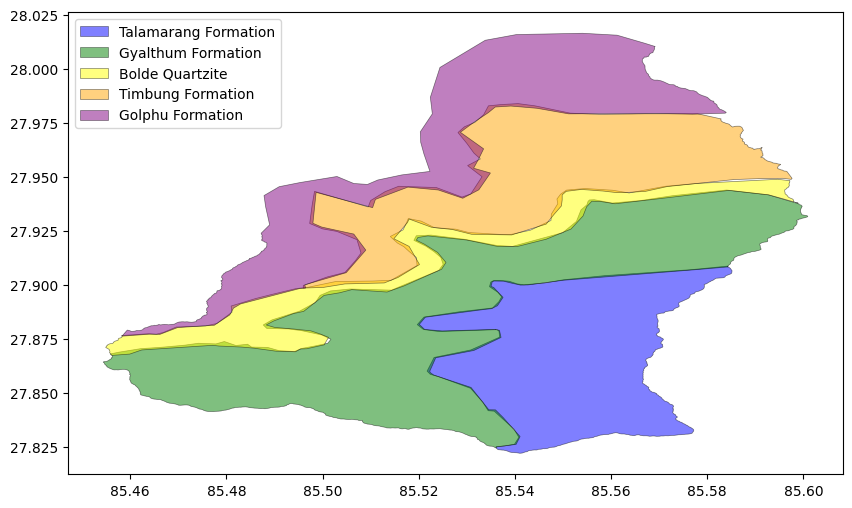

In [152]:
# Define the desired CRS, for example, "EPSG:4326" for WGS 84 or any other projection you need.
desired_crs = "EPSG:4326"

# Reproject the GeoDataFrame to the desired CRS
gdf2 = gdf2.to_crs(desired_crs)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the overlay shapefile with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):  # Check if geometry is a Polygon
        x_poly, y_poly = geom.exterior.xy  # Get exterior coordinates
        if label not in plotted_labels:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
            plotted_labels.add(label)
        else:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
    
    elif isinstance(geom, MultiPolygon):  # Check if geometry is a MultiPolygon
        for part in geom.geoms:  # Iterate over constituent polygons
            x_poly, y_poly = part.exterior.xy
            if label not in plotted_labels:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
                plotted_labels.add(label)
            else:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)

# Add legend, title, etc., as needed
ax.legend()
plt.show()


# One Traverse Plot

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_41284/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_4

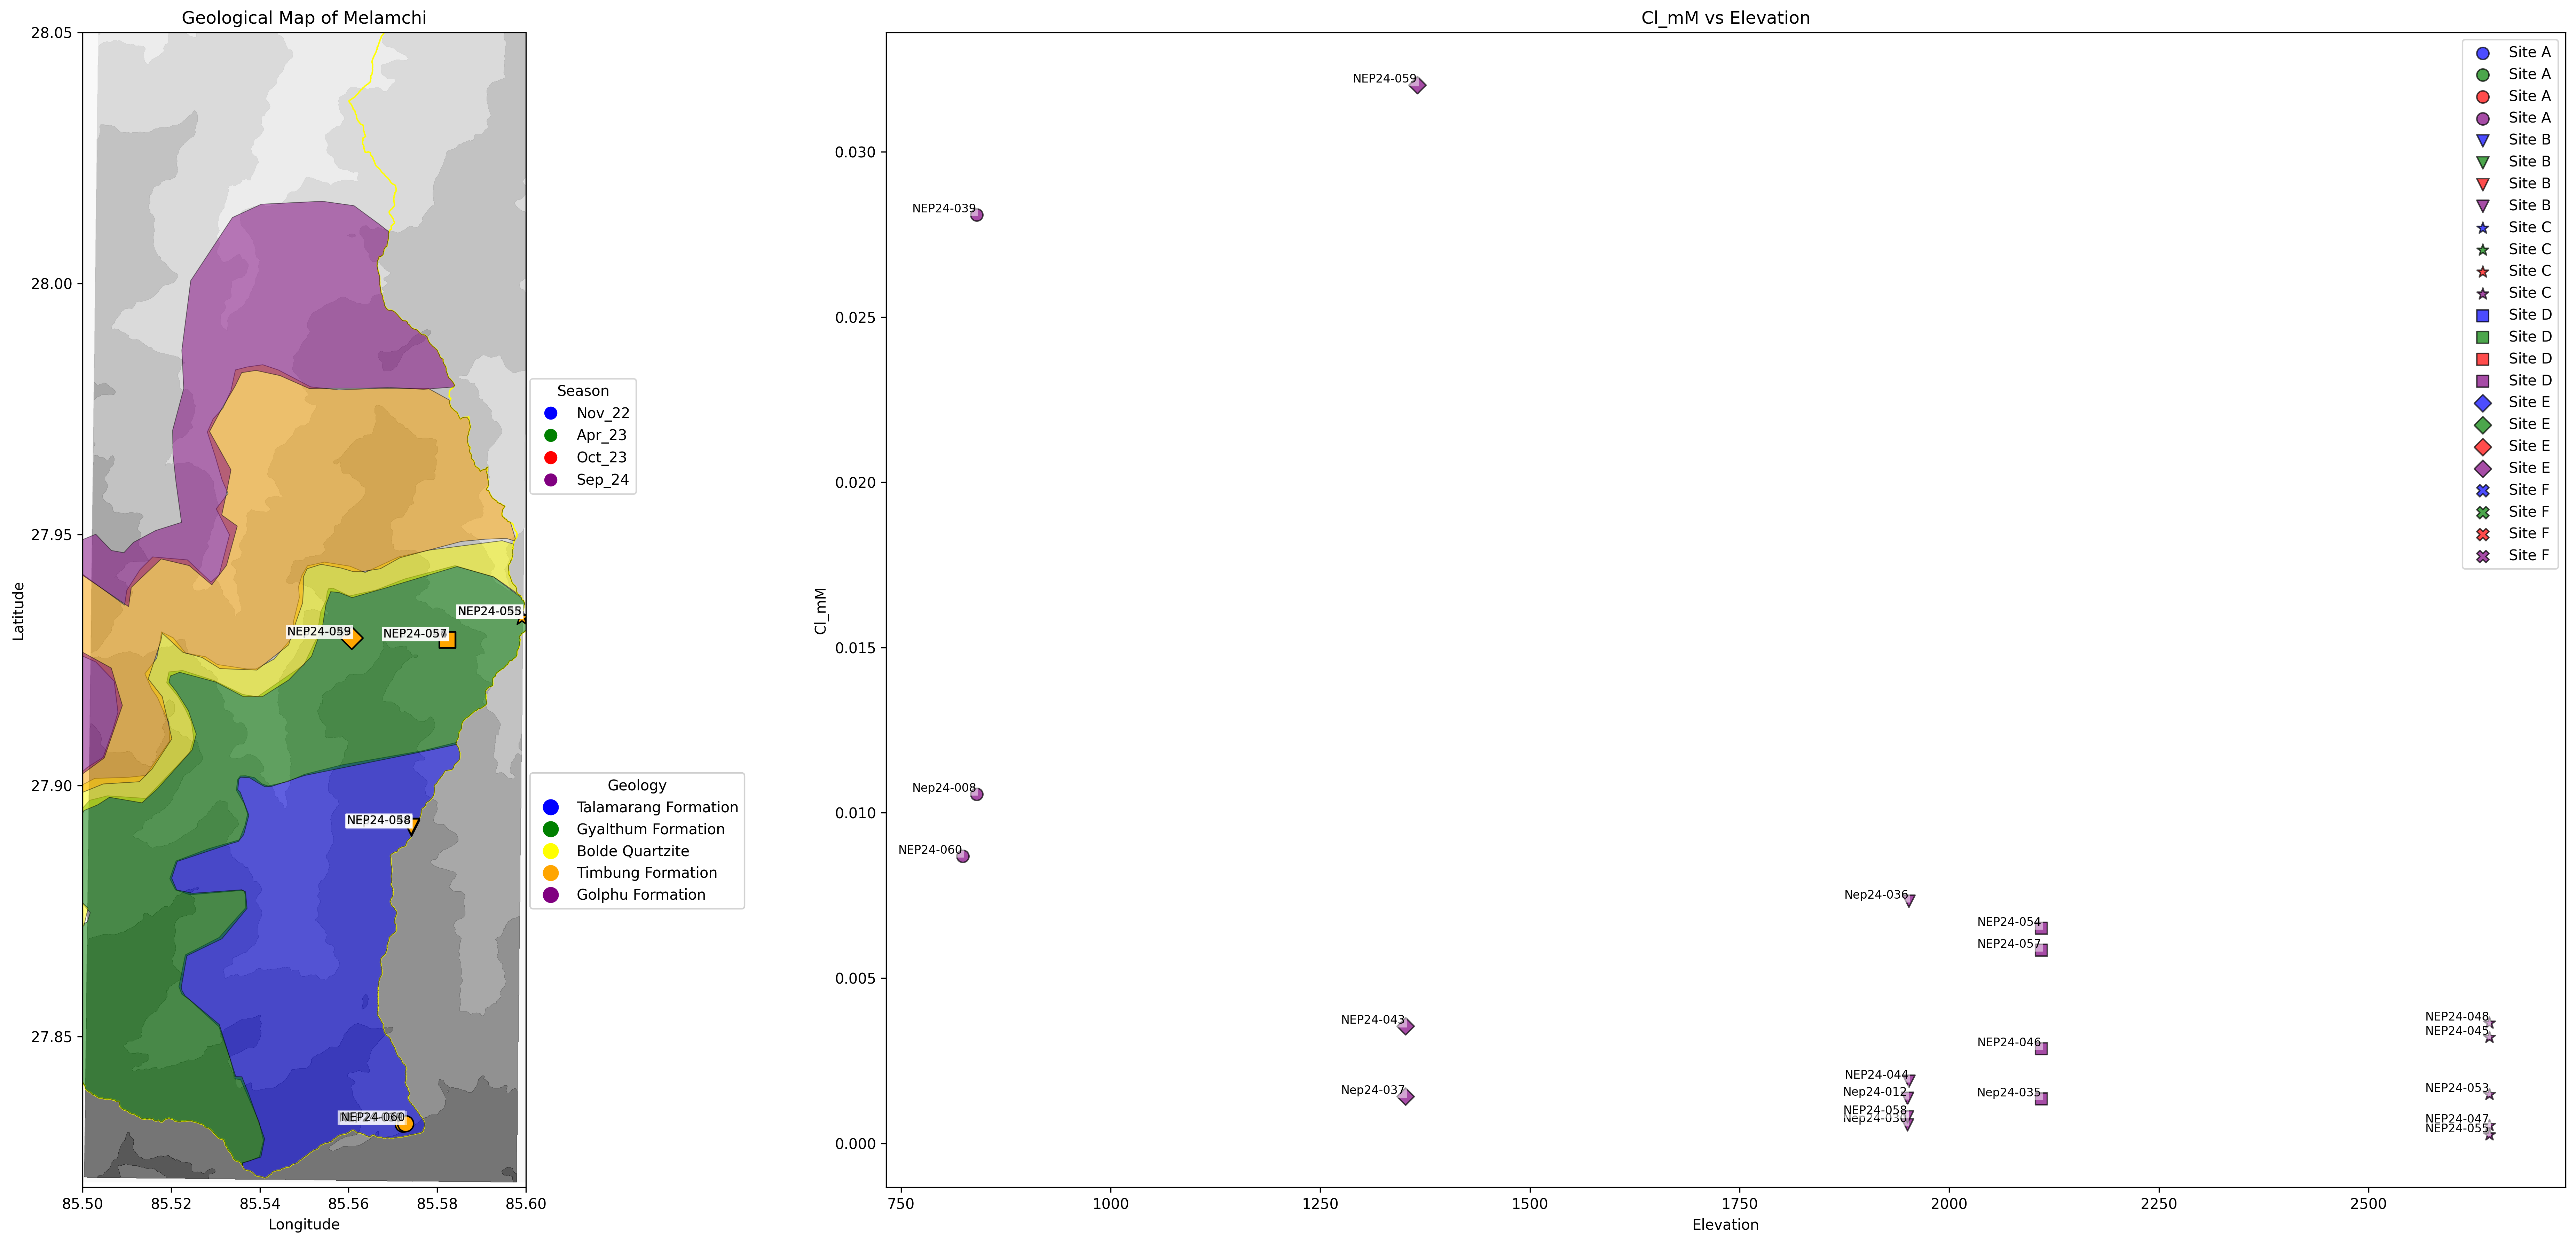

In [153]:

# Create the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(30, 12), dpi = 300)

# Define the variables and traverses
variables = ['Cl_mM', 'Elevation']
tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']

GNS_markers = ['S1', 'S2', 'S3', 'S4']



ax1 = axs[0]
ax2 = axs[1]



# Plot the DEM data in grayscale on ax1
c = ax1.contourf(x, y, z, cmap='Greys', alpha=0.7)


# Overlay the shapefile for watershed boundary
gdf.plot(ax=ax1, facecolor='none', edgecolor='yellow', alpha=1, linewidth=1, label='Melamchi Watershed')

# Overlay gdf2 on ax1 with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
geology_handles = []  # Handles for individual geology legend next to ax1
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):
        x_poly, y_poly = geom.exterior.xy
        ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
        if label not in plotted_labels:
            plotted_labels.add(label)
            geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))
    elif isinstance(geom, MultiPolygon):
        for part in geom.geoms:
            x_poly, y_poly = part.exterior.xy
            ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
            if label not in plotted_labels:
                plotted_labels.add(label)
                geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))

cl_min = df_rain[variables[0]].min()
cl_max = df_rain[variables[0]].max()

#filter so that df_copy only contains Sample IDs that start with NEP22:
df_filtered = df_rain.dropna(subset=['Traverse'])

#print(df_filtered['Traverse'])
#df_filtered = df_filtered[df_filtered['Traverse'].str.startswith('Traverse 3')]



for site, marker in site_markers.items():
    site_data = df_filtered[df_filtered['Traverse'] == site]
    ax1.scatter(
        site_data['Longitude'], site_data['Latitude'], s=120, cmap='viridis', alpha=1, 
        edgecolor='k', marker=marker, label=f'{site} - Nep24', color='orange'
    )
    
    # # Add SampleID labels
    for i, row in site_data.iterrows():
        ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    
# #plot abra samples as red rectangles
# ax1.scatter(df_abra['Longitude'], df_abra['Latitude'], color='red', s=200, alpha=1, edgecolor='k', marker='s', label='Abra Samples')        

# for i, row in df_abra.iterrows():
#     ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


        
        
# Add a colorbar to ax1 using the scatter plot variable `c`
#cbar = plt.colorbar(c, ax=ax1, location='right', pad=0.2)


# Create a legend for the seasons in ax1
season_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=season) 
    for season, color in season_colors.items()
]

# # Set map limits for ax1
ax1.set_xlim(85.5, 85.6)
ax1.set_ylim(27.82, 28.05)

# ax1.set_xlim(85.54, 85.60)
# ax1.set_ylim(27.90, 27.95)


kyul_data = pd.DataFrame({
    'Latitude': [27.932942],
    'Longitude': [85.563408],
    'Label': ['KYUL']
})



thalo_data = pd.DataFrame({
    'Latitude': [27.928879],
    'Longitude': [85.585605],
    'Label': ['THALO']
})

# ax1.scatter(
#     kyul_data['Longitude'], kyul_data['Latitude'],
#     color='red', s=200, alpha=1, edgecolor='k', marker='o', label=kyul_data['Label'][0]
# )

# ax1.scatter(
#     thalo_data['Longitude'], thalo_data['Latitude'],
#     color='blue', s=200, alpha=1, edgecolor='k', marker='o', label=thalo_data['Label'][0]
# )

# BK sampling site: 27.871276N, 85.542173E
bk_data = pd.DataFrame({
    'Latitude': [27.871276],
    'Longitude': [85.542173],
    'Label': ['BK']
})

# ax1.scatter(
#     bk_data['Longitude'], bk_data['Latitude'],
#     color='green', s=200, alpha=1, edgecolor='k', marker='o', label=bk_data['Label'][0]
# )


# Labels and title for ax1
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
#ax1.set_title(f'DEM Map with {variables[1]} Samples for {traverse}')
ax1.set_title('Geological Map of Melamchi')
season_legend = ax1.legend(handles=season_handles, title='Season', loc='upper left', bbox_to_anchor=(1.01, 0.7),
    borderaxespad=0.)

# Place the geology legend to the right of ax1
geology_legend = ax1.legend(
    handles=geology_handles, 
    title='Geology', 
    loc='center left', 
    bbox_to_anchor=(1.01, 0.3),
    borderaxespad=0.
)

# Add both legends to the plot
ax1.add_artist(geology_legend)
ax1.add_artist(season_legend)

for site, marker in site_markers.items():
    
    site_data = df_filtered[df_filtered['Traverse'] == site]

    for season, color in season_colors.items():
        season_data = site_data[site_data['Season'] == season]
        ax2.scatter(
            season_data[variables[1]], season_data[variables[0]], 
            c=color, s=70, alpha=0.7, edgecolor='k', 
            marker=marker, label=site
        )
        for i, row in season_data.iterrows():
             ax2.text(row[variables[1]], row[variables[0]], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


ax2.set_xlabel(f'{variables[1]}')
ax2.set_ylabel(f'{variables[0]}')
#ax2.set_xscale('log')
ax2.set_title(f'{variables[0]} vs {variables[1]}')
ax2.legend()


# Adjust layout and save    
plt.tight_layout()
plt.savefig('Cl_correct.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

In [ ]:
# create a special df with only sites C,D,E on rain_df traverses
df_rain_copy = df_rain.copy()


df_rain_copy = df_rain_copy[df_rain_copy['Traverse'].isin(['Site C', 'Site D', 'Site E'])]

# Filter to remove NEP24-059
df_rain_copy = df_rain_copy[df_rain_copy['Sample ID'] != 'NEP24-059']

In [ ]:
df_rain_copy


In [ ]:
# average Cl concentration for each site
df_rain_copy.groupby('Traverse')['Cl_mM'].mean()

# Average of all of them
df_rain_copy['Cl_mM'].mean()